<h1><i> The Sparks Foundation </i></h1>

<h2> Ayush Srivastava </h2>

<h4> Task #2 Prediction Using Unsupervised Machine Learning using IRIS Dataset </h4>

<h6> Importing Libraries </h6>

In [1]:
import pandas as pd
import numpy as np
import math
import operator
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") #to remove unwanted warnings

print('All libraries imported successfully')


All libraries imported successfully


In [8]:
iris = pd.read_csv('Iris.csv')
print ('Data Imported Successfully')

Data Imported Successfully


In [3]:
iris.head() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<h6> Splitting the dataset into train and test using Scikit Learn built in function </h6>

In [4]:
x=iris.iloc[1:,:3]#features
y=iris.iloc[1:,5:]#class labels
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#test_size determines the percentage of test data you want here
#train=80% and test=20% data is randomly split
print(x)
print(y)


      Id  SepalLengthCm  SepalWidthCm
1      2            4.9           3.0
2      3            4.7           3.2
3      4            4.6           3.1
4      5            5.0           3.6
5      6            5.4           3.9
..   ...            ...           ...
145  146            6.7           3.0
146  147            6.3           2.5
147  148            6.5           3.0
148  149            6.2           3.4
149  150            5.9           3.0

[149 rows x 3 columns]
            Species
1       Iris-setosa
2       Iris-setosa
3       Iris-setosa
4       Iris-setosa
5       Iris-setosa
..              ...
145  Iris-virginica
146  Iris-virginica
147  Iris-virginica
148  Iris-virginica
149  Iris-virginica

[149 rows x 1 columns]


<h6> Finding the best K </h6>
<p> To obtain the best k here I will use cross validation score.</p>
<p>From the cross_validation I am finding the errors and min error k will be the best k.</p>

In [5]:
cv_scores = []
neighbors = list(np.arange(3,50,2))
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n,algorithm = 'brute')
    cross_val = cross_val_score(knn, x_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(cross_val.mean())
    
error = [1-x for x in cv_scores]
optimal_n = neighbors[ error.index(min(error)) ]
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n,algorithm = 'brute')
knn_optimal.fit(x_train,y_train)
pred = knn_optimal.predict(x_test)
acc = accuracy_score(y_test,pred)*100
print("The accuracy for optimal k = {0} using brute is {1}".format(optimal_n,acc))

The accuracy for optimal k = 19 using brute is 96.66666666666667


<h6> Classification Report </h6>

In [6]:
print("classification_report using brute force")
print(classification_report(y_test,pred))


classification_report using brute force
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



<h6> Drawing a heat map for finding what percentage of flowers that are predicted from model are correct comparing with actual class labels.</h6>

<function matplotlib.pyplot.show(*args, **kw)>

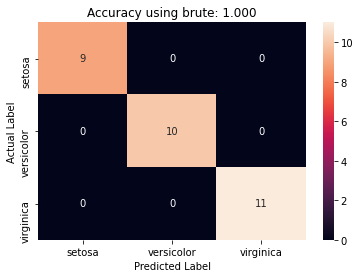

In [7]:
clf = SVC(kernel = 'linear').fit(x_train, y_train)
clf.predict(x_train)
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = ['setosa','versicolor','virginica'], columns = ['setosa','versicolor','virginica'])


sns.heatmap(cm_df, annot = True)
plt.title('Accuracy using brute: {0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show

<h6> Observations </h6>
<p> All setosa flowers are correctly classified by the model above </p>
<p> All versicolor flowers are correctly classified </p>
<p> All virginica flowers are correctly classified by the model </p>